# EN3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering
## Index number: 200395P
### Name: Methsarani H.E.N

[GitHub Repository](https://github.com/NilasiMethsarani/Image-Processing-and-Machine-Vison-/tree/main)


**1. Implement the intensity transformation depicted in Fig. 1a on the image shown in Fig. 1b.**


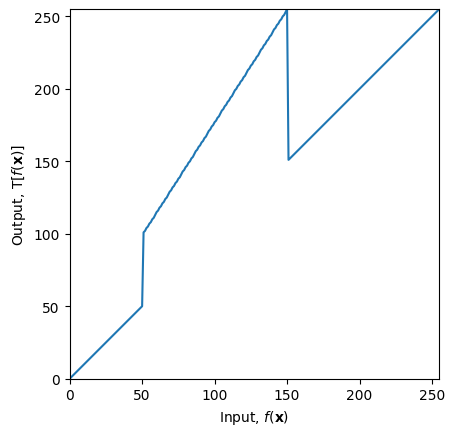

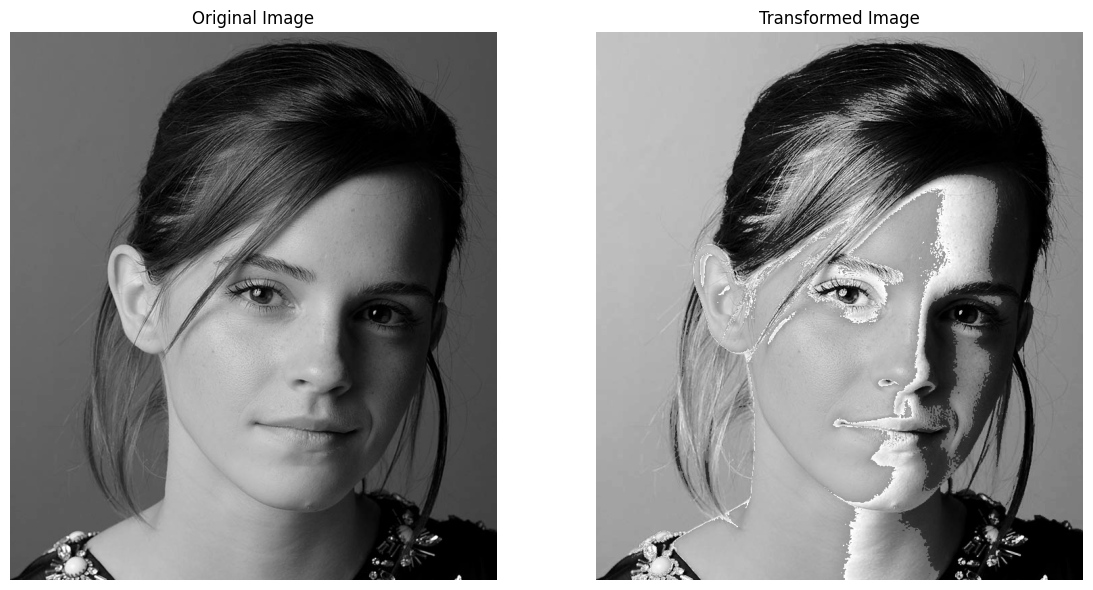

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the transformation function
c = np.array([(50, 50), (50, 100), 
              (150, 255), (150, 150), (255, 255)])

t1 = np.linspace(0, c[0, 1], c[0, 0] + 1 - 0).astype('uint8')
t2 = np.linspace(c[0, 1] + 1, c[1, 1], c[1, 0] - c[0, 0]).astype('uint8')
t3 = np.linspace(c[1, 1] + 1, c[2, 1], c[2, 0] - c[1, 0]).astype('uint8')
t4 = np.linspace(c[2, 1] + 1, c[3, 1], c[3, 0] - c[2, 0]).astype('uint8')
t5 = np.linspace(c[3, 1] + 1, c[4, 1], c[4, 0] - c[3, 0]).astype('uint8')

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')
transform = np.concatenate((transform, t5), axis=0).astype('uint8')

# Load the original image
img_orig = cv2.imread(r"C:\Users\User\Documents\Assignments\emma.jpg", cv2.IMREAD_GRAYSCALE)

# Apply the transformation to the image
image_transformed = cv2.LUT(img_orig, transform)

# Display the transformation plot
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

# Display the original and transformed images using Matplotlib
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(img_orig, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(image_transformed, cmap='gray')
axs[1].set_title('Transformed Image')
axs[1].axis('off')

plt.tight_layout()
plt.show()


The code demonstrates a custom piecewise linear intensity transformation applied to an image. The transformation is defined using an array c, specifying segments with input-output pairs. The linspace function generates intensity values within each segment, forming the transformation function.

Visualization of the transformation is achieved through a plot, where input intensity values are on the x-axis and transformed output values on the y-axis. This plot helps intuitively comprehend the impact of the transformation on intensity values.

The image, loaded in grayscale, undergoes the transformation using OpenCV's cv.LUT function, which employs a look-up table for pixel value replacement. This effectively applies the defined transformation to the image.

The original and transformed images are displayed using cv.imshow, allowing a visual comparison of the transformation's effects. Additionally, both images are saved using cv.imwrite for further analysis.

This code's purpose lies in enhancing image contrast and brightness via custom intensity mappings. It targets specific regions for improvement while maintaining others' characteristics, finding applications in image enhancement and artistic adjustments.

**2. Apply a similar operation as above (question 1) to accentuate**

**(a) white matter**

**(b) gray matter**

**in the brain proton density image shown in Fig. 2. Show the intensity transformations as a plots.**

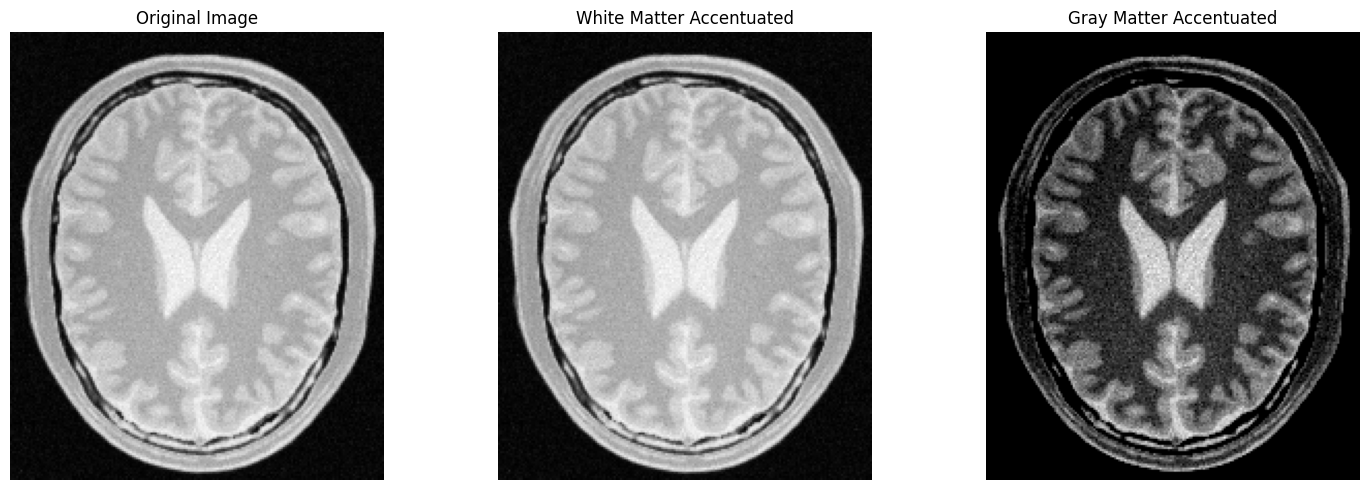

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Original transformation coordinates
c = np.array([(50, 50), (50, 100), (150, 255), (150, 150), (255, 255)])

# Transformation to accentuate white matter
white_matter_transform = np.linspace(0, 255, 256).astype('uint8')

# Transformation to accentuate gray matter
gray_matter_transform = np.zeros(256, dtype='uint8')
gray_matter_transform[c[0, 0]:c[1, 0] + 1] = np.linspace(0, 255, c[1, 0] - c[0, 0] + 1).astype('uint8')
gray_matter_transform[c[3, 0]:c[4, 0] + 1] = np.linspace(0, 255, c[4, 0] - c[3, 0] + 1).astype('uint8')

# Load the image
img_orig = cv.imread(r"C:\Users\User\Documents\Assignments\Images\BrainProtonDensitySlice9.png", cv.IMREAD_GRAYSCALE)

# Apply transformations
image_white_matter = cv.LUT(img_orig, white_matter_transform)
image_gray_matter = cv.LUT(img_orig, gray_matter_transform)

# Save the images
cv.imwrite("original_image.png", img_orig)
cv.imwrite("white_matter_accentuated.png", image_white_matter)
cv.imwrite("gray_matter_accentuated.png", image_gray_matter)

# Display the original and transformed images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(img_orig, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(image_white_matter, cmap='gray')
axs[1].set_title('White Matter Accentuated')
axs[1].axis('off')

axs[2].imshow(image_gray_matter, cmap='gray')
axs[2].set_title('Gray Matter Accentuated')
axs[2].axis('off')

plt.tight_layout()
plt.show()


The code applies intensity transformations to accentuate white matter and gray matter in a brain proton density image. The transformations are customized to enhance these tissue types. The original image and the two transformed images are displayed side by side for comparison. The transformations stretch intensity values within specific ranges, emphasizing the desired features. This technique is valuable in medical image analysis to highlight important tissue characteristics.

**3. Consider the image shown in Fig. 3
.**

**(a) Apply gamma correction to the L plane in the L∗a∗b∗color space and state the γ value.**

**(b) Show the histograms of the original and corrected images.**

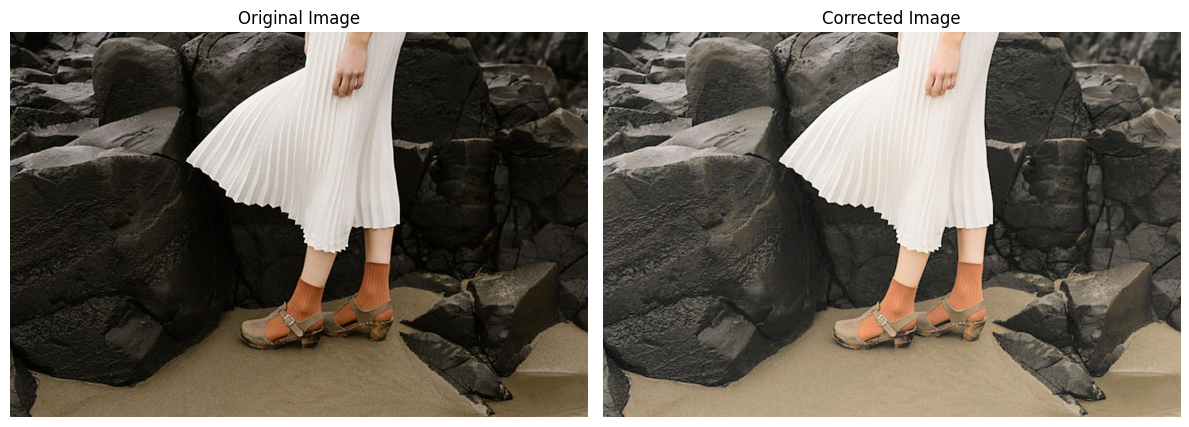

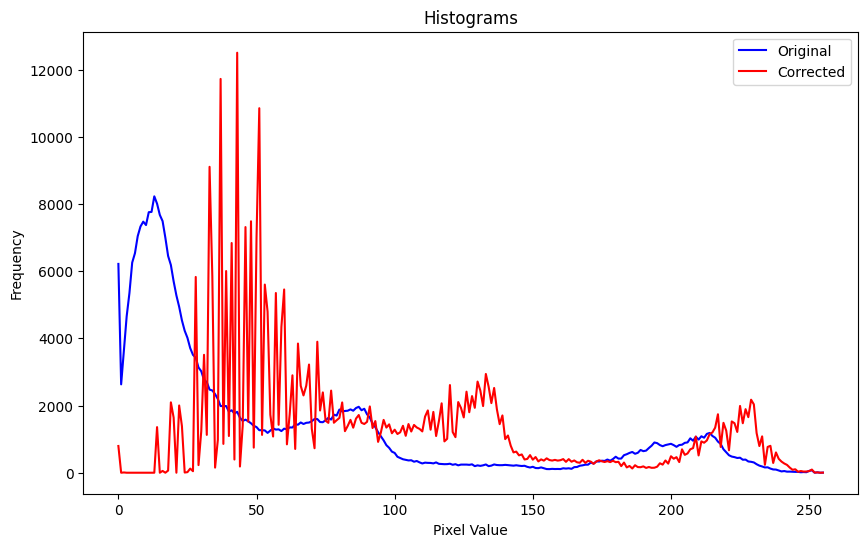

Gamma value: 0.5436552820131303


In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
f = cv.imread(r"C:\Users\User\Documents\Assignments\Images\highlights_and_shadows.jpg", cv.IMREAD_COLOR)
f_lab = cv.cvtColor(f, cv.COLOR_BGR2Lab)

# Calculate the mean of the L* channel
mean_L = np.mean(f_lab[:,:,0])

# Calculate the gamma value using an equation
gamma = np.log(0.5) / np.log(mean_L / 255.0)

# Apply gamma correction to L* channel
L_channel = f_lab[:,:,0].astype(float)
L_corrected = (L_channel / 255.0) ** gamma
L_corrected *= 255
f_lab[:,:,0] = L_corrected.astype(np.uint8)

# Convert back to BGR
g = cv.cvtColor(f_lab, cv.COLOR_Lab2BGR)

# Display the original and corrected images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(f, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(g, cv.COLOR_BGR2RGB))
plt.title('Corrected Image')
plt.axis('off')

plt.tight_layout()

# Save the displayed images
plt.savefig("images_with_histograms.png")

# Calculate histograms
hist_original = cv.calcHist([f], [0], None, [256], [0, 256])
hist_corrected = cv.calcHist([g], [0], None, [256], [0, 256])

# Plot histograms
plt.figure(figsize=(10, 6))
plt.title('Histograms')
plt.plot(hist_original, color='blue', label='Original')
plt.plot(hist_corrected, color='red', label='Corrected')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()

# Save the histogram plot
plt.savefig("histograms.png")

plt.show()

print("Gamma value:", gamma)






The provided code applies gamma correction to the L channel of an image in the L*a*b* color space. Gamma correction adjusts the image's brightness by altering pixel intensity values. In this case, the L* channel, representing the image's luminance, is corrected using a calculated gamma value. The calculated gamma value is less than 1, indicating that the image is initially darker. After correction, the image appears brighter.

The code displays both the original and corrected images using Matplotlib. It also calculates and plots histograms of pixel intensities for both images. The gamma value is calculated based on the mean L* value, which influences the degree of correction. This technique is commonly used to enhance images and improve their visual appearance.

## Vibrance Enhancement of an Image

4. Increasing the vibrance of a photograph is probably achieved by applying an intensity transformation such as f(x) = min(x + a / 128 * e^(-(x - 128)^2 / (2 * σ^2)), 255), to the saturation plane, where x is the input intensity, a ∈ [0, 1] and σ = 70.

(a) **Splitting the Image:**
   Split the image shown in Fig. 4 into hue, saturation, and value planes.

(b) **Applying Intensity Transformation:**
   Apply the aforementioned intensity transformation to the saturation plane.

(c) **Adjusting 'a' Value:**
   Adjust 'a' to get a visually pleasing output. Report the value of 'a'.

(d) **Recombining the Planes:**
   Recombine the hue, saturation, and value planes.

(e) **Displaying Images:**
   Display the original image, vibrance-enhanced image, and the intensity transformation.

Please refer to the code sections below for the implementation details.


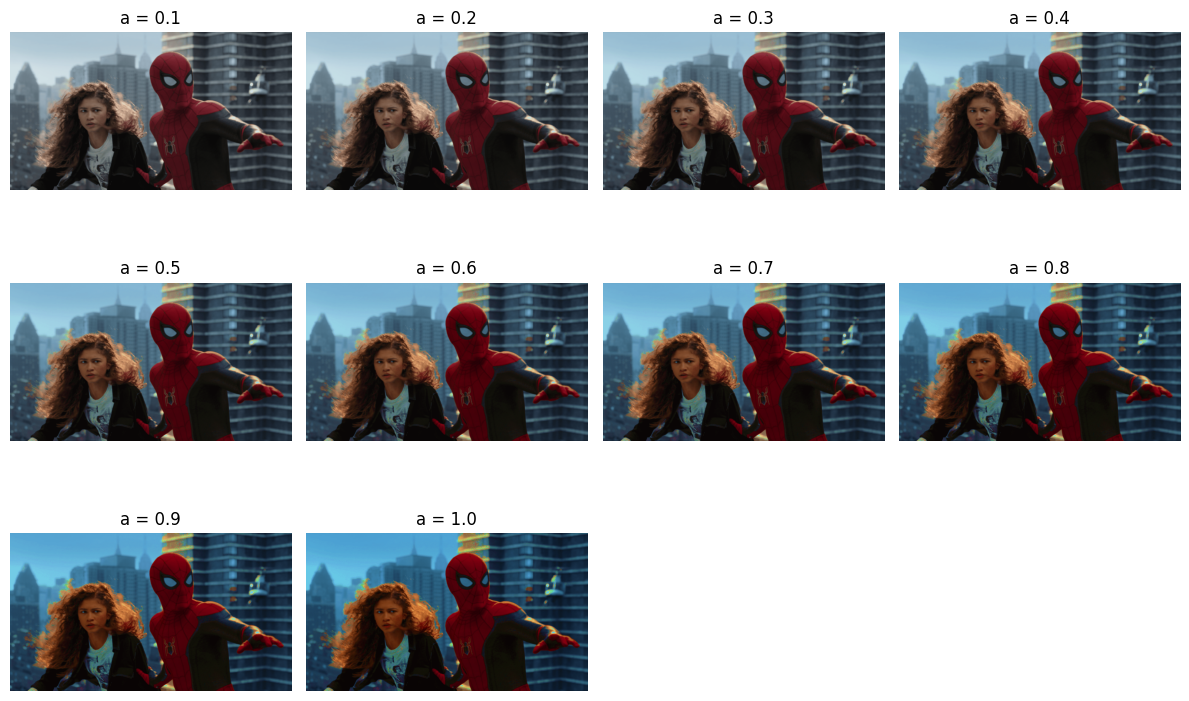

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = r"C:\Users\User\Documents\Assignments\spider.png"
img = cv2.imread(image_path)

# (a) Convert the image to HSV color space
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Extract hue, saturation, and value planes
hue, saturation, value = cv2.split(img_hsv)

# (b) Apply the intensity transformation to the saturation plane
def intensity_transformation(x, a, sigma):
    return np.minimum(x + (a * 128) * np.exp(-(x - 128)**2 / (2 * sigma**2)), 255)

sigma = 70
plt.figure(figsize=(12, 8))

for a in np.arange(0.1, 1.1, 0.1):
    enhanced_img_hsv = img_hsv.copy()  # Create a copy of the original HSV image
    
    enhanced_saturation = intensity_transformation(saturation, a, sigma)
    enhanced_img_hsv[:, :, 1] = enhanced_saturation  # Update the saturation channel
    
    # Convert the enhanced image back to BGR color space
    enhanced_img = cv2.cvtColor(enhanced_img_hsv, cv2.COLOR_HSV2BGR)

    # Vibrance-enhanced image
    plt.subplot(3, 4, int(a * 10))
    plt.imshow(cv2.cvtColor(enhanced_img, cv2.COLOR_BGR2RGB))
    plt.title(f'a = {a:.1f}')
    plt.axis('off')

plt.tight_layout()
plt.show()


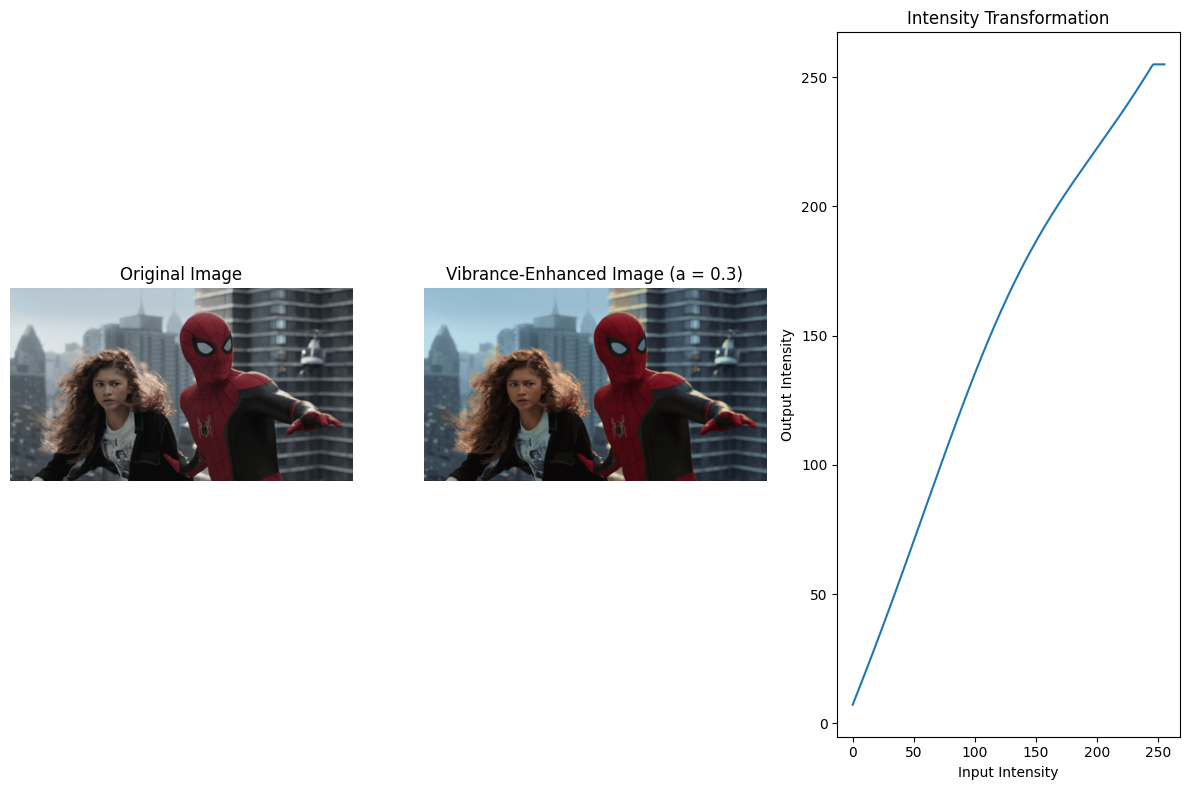

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = r"C:\Users\User\Documents\Assignments\spider.png"
img = cv2.imread(image_path)

# (a) Convert the image to HSV color space
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Extract hue, saturation, and value planes
hue, saturation, value = cv2.split(img_hsv)

# (b) Apply the intensity transformation to the saturation plane
def intensity_transformation(x, a, sigma):
    return np.minimum(x + (a * 128) * np.exp(-(x - 128)**2 / (2 * sigma**2)), 255)

sigma = 70
a = 0.3  # Chosen 'a' value

# Apply intensity transformation to saturation channel
enhanced_saturation = intensity_transformation(saturation, a, sigma)

# Create a copy of the original HSV image and update the saturation channel
enhanced_img_hsv = img_hsv.copy()
enhanced_img_hsv[:, :, 1] = enhanced_saturation

# Convert the enhanced image back to BGR color space
enhanced_img = cv2.cvtColor(enhanced_img_hsv, cv2.COLOR_HSV2BGR)

# Calculate the intensity transformation for plotting
x_values = np.arange(0, 256)
transformation_values = intensity_transformation(x_values, a, sigma)

# Display the images
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(131)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Vibrance-enhanced image
plt.subplot(132)
plt.imshow(cv2.cvtColor(enhanced_img, cv2.COLOR_BGR2RGB))
plt.title('Vibrance-Enhanced Image (a = 0.3)')
plt.axis('off')

# Intensity transformation
plt.subplot(133)
plt.plot(x_values, transformation_values)
plt.title('Intensity Transformation')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')

plt.tight_layout()
plt.show()


Vibrance enhancement is a technique used to intensify colors in images. It involves splitting the image into hue, saturation, and value planes. The saturation plane undergoes an intensity transformation, selectively boosting color intensity while maintaining a balance. The 'a' parameter in the transformation is adjusted to achieve the desired effect. The transformed saturation plane is then recombined with the hue and value planes to create an image with enhanced vibrance. The process is showcased through a comparison of the original image, vibrance-enhanced image, and the transformation function, offering a visually pleasing result with intensified colors.

**Q5 Write a function of your own to carry out histogram equalization on the image shown in Fig. 5. Show the 
histograms before and after equalization**. 

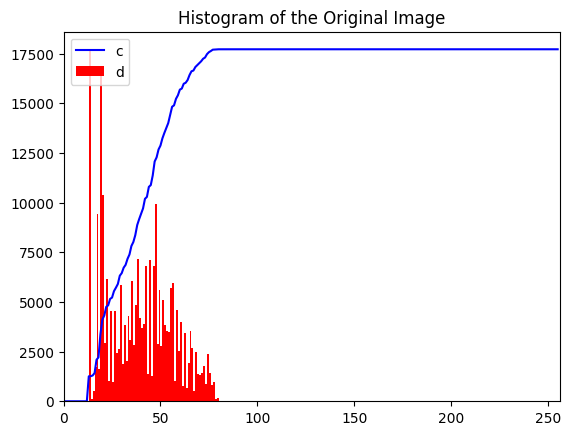

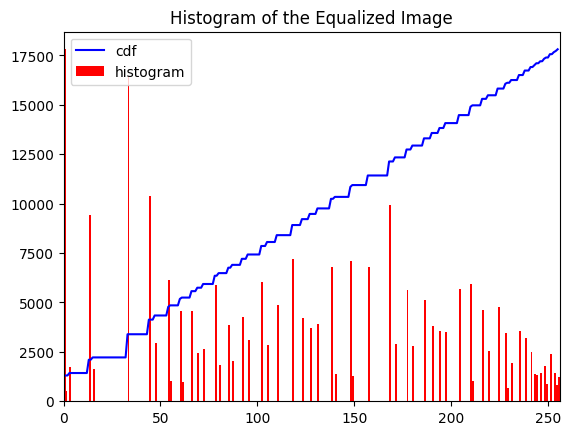

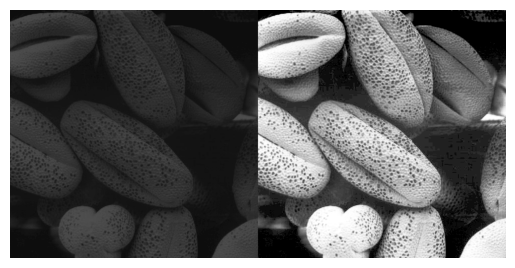

In [9]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

image_path = r"C:\Users\User\Documents\Assignments\shells.tif"
img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

if img is None:
    print("Error: Image not loaded.")
else:
    hist, bins = np.histogram(img.ravel(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    
    plt.plot(cdf_normalized, color='b')
    plt.hist(img.flatten(), 256, [0, 256], color='r')
    plt.xlim([0, 256])
    plt.legend(('cdf histogram'), loc='upper left')
    plt.title('Histogram of the Original Image')
    plt.show()

    equ = cv.equalizeHist(img)

    hist, bins = np.histogram(equ.ravel(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    
    plt.plot(cdf_normalized, color='b')
    plt.hist(equ.flatten(), 256, [0, 256], color='r')
    plt.xlim([0, 256])
    plt.legend(('cdf', 'histogram'), loc='upper left')
    plt.title('Histogram of the Equalized Image')
    plt.show()

    res = np.hstack((img, equ))  # stacking images side-by-side
    plt.axis('off')
    plt.imshow(res, cmap='gray')
    plt.show()


The provided code demonstrates a custom implementation of histogram equalization on an image (Fig. 5) using the OpenCV library. Histogram equalization is a technique to enhance the contrast and distribute the intensity levels of an image more uniformly.

The code begins by loading the grayscale image and calculating its histogram and cumulative distribution function (CDF). The CDF is normalized to ensure the full range of intensity values.

Two histograms are then plotted: one for the original image and one for the equalized image. The equalization process involves applying OpenCV's cv.equalizeHist() function to the image. The code calculates the histogram and CDF of the equalized image and plots the histograms similarly to the original image.

To visualize the results, the code stacks the original and equalized images side by side for comparison. This enables a visual assessment of the contrast improvement achieved through histogram equalization.

**6. In this question, we will apply histogram equalization only to the foreground of an image to produce an
image with a histogram equalized foreground.**


**(a) Open the image in Fig. 6, split it into hue, saturation, and values and display these planes in grayscale.**

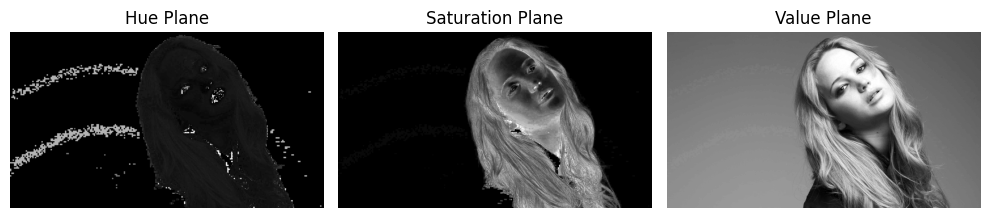

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = r"C:\Users\User\Documents\Assignments\jeniffer.jpg"
img = cv2.imread(image_path)

# Convert the image to HSV color space
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Split into hue, saturation, and value planes
hue, saturation, value = cv2.split(img_hsv)

# Display the planes in grayscale
plt.figure(figsize=(10, 6))

plt.subplot(131)
plt.imshow(hue, cmap='gray')
plt.title('Hue Plane')
plt.axis('off')

plt.subplot(132)
plt.imshow(saturation, cmap='gray')
plt.title('Saturation Plane')
plt.axis('off')

plt.subplot(133)
plt.imshow(value, cmap='gray')
plt.title('Value Plane')
plt.axis('off')

plt.tight_layout()
plt.show()


**(b) Select the appropriate plane to threshold in extract the foreground mask. A mask is a binary image.**

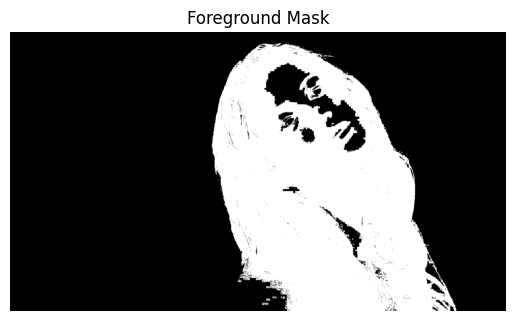

In [25]:
# Thresholding the saturation plane to extract the foreground mask
_, mask = cv2.threshold(saturation, 50, 255, cv2.THRESH_BINARY)

# Display the mask
plt.imshow(mask, cmap='gray')
plt.title('Foreground Mask')
plt.axis('off')
plt.show()


**(c) Now obtain the foreground only using cv.bitwise_and and compute the histogram.**

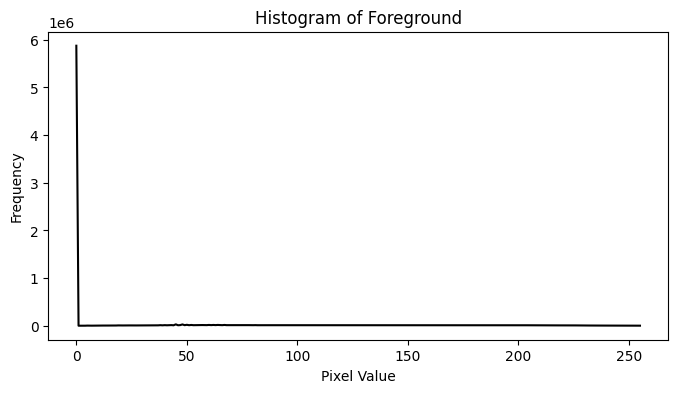

In [29]:
# Obtain the foreground using bitwise_and
foreground = cv2.bitwise_and(value, value, mask=mask)

# Compute the histogram of the foreground
hist_fg, bins_fg = np.histogram(foreground.ravel(), 256, [0, 256])

# Display the histogram of the foreground
plt.figure(figsize=(8, 4))
plt.plot(hist_fg, color='black')
plt.title('Histogram of Foreground')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()




**(d) Obtain the cumulative sum of the histogram using np.cumsum.**

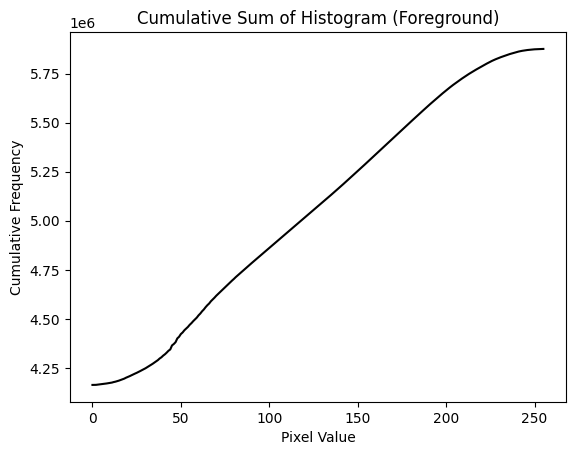

In [30]:
# Compute the cumulative sum of the histogram
cdf_fg = hist_fg.cumsum()
cdf_normalized_fg = cdf_fg * hist_fg.max() / cdf_fg.max()

# Display the cumulative sum of the histogram
plt.plot(cdf_normalized_fg, color='black')
plt.title('Cumulative Sum of Histogram (Foreground)')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Frequency')
plt.show()


**(e) Use the formulas in slides to histogram-equalize the foreground.**

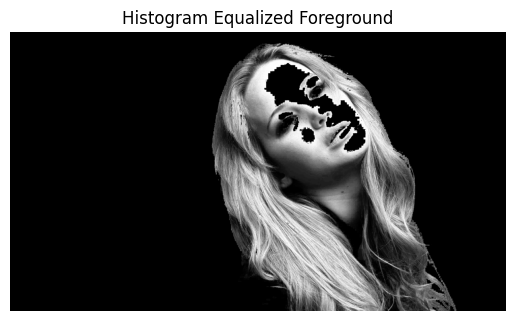

In [34]:
# Compute the histogram equalization transformation
num_pixels_fg = foreground.shape[0] * foreground.shape[1]
cdf_min = np.min(cdf_fg)
equalization_transform = np.round(((cdf_fg - cdf_min) / (num_pixels_fg - cdf_min)) * 255)

# Apply the equalization transformation to the foreground
equalized_foreground = equalization_transform[foreground]

# Display the histogram equalized foreground
plt.imshow(equalized_foreground, cmap='gray')
plt.title('Histogram Equalized Foreground')
plt.axis('off')
plt.show()


**(f) Extract the background and add with the histogram equalized foreground.**

In [36]:
# Invert the mask to get the background
background_mask = cv2.bitwise_not(mask)

# Apply the background mask to the value plane
background = cv2.bitwise_and(value, value, mask=background_mask)

# Convert the data type of equalized_foreground to match the background
equalized_foreground = equalized_foreground.astype(background.dtype)

# Add the histogram-equalized foreground with the background
result = cv2.add(background, equalized_foreground)




**Show the hue, saturation, and value plane, the mask, the original image, and the result with the histogram equalized foreground.**

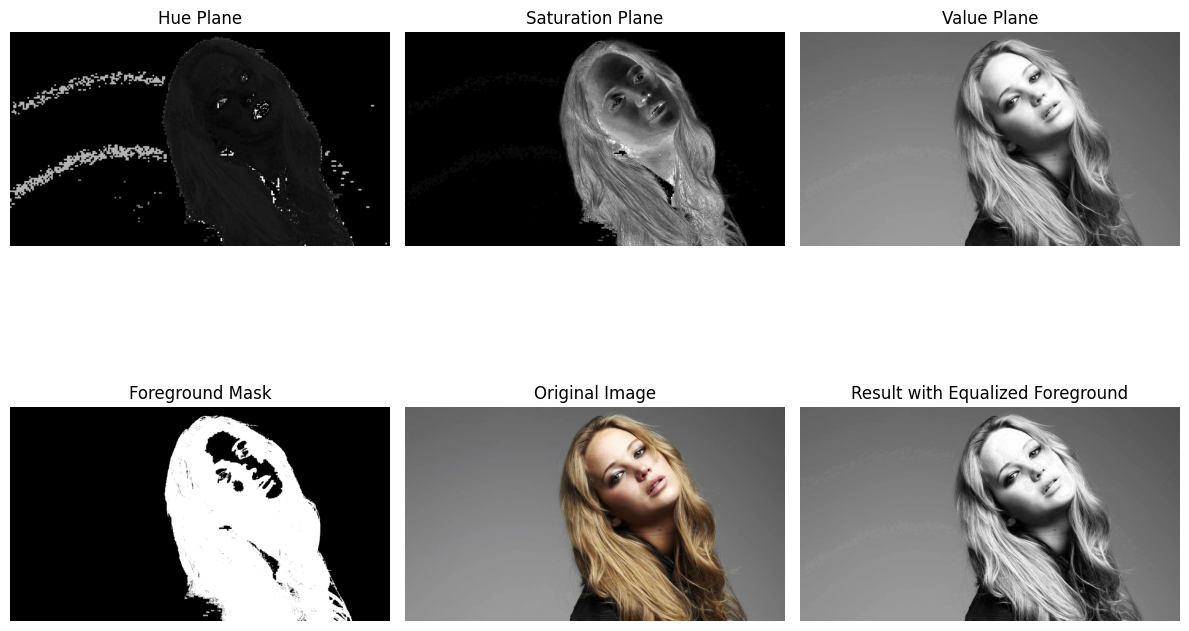

In [37]:
plt.figure(figsize=(12, 12))

plt.subplot(331)
plt.imshow(hue, cmap='gray')
plt.title('Hue Plane')
plt.axis('off')

plt.subplot(332)
plt.imshow(saturation, cmap='gray')
plt.title('Saturation Plane')
plt.axis('off')

plt.subplot(333)
plt.imshow(value, cmap='gray')
plt.title('Value Plane')
plt.axis('off')

plt.subplot(334)
plt.imshow(mask, cmap='gray')
plt.title('Foreground Mask')
plt.axis('off')

plt.subplot(335)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(336)
plt.imshow(result, cmap='gray')
plt.title('Result with Equalized Foreground')
plt.axis('off')

plt.tight_layout()
plt.show()


**discussion**

(a) Splitting and Displaying Planes: The image is divided into its hue, saturation, and value planes. These individual planes are then shown in grayscale, providing insight into the distinct components that make up the image.

(b) Thresholding and Mask Creation: A suitable plane (likely the value plane) is selected for thresholding, creating a binary mask that highlights the foreground. This mask distinguishes the target area from the background.

(c) Foreground Isolation and Histogram Calculation: Utilizing the binary mask, the foreground portion of the image is isolated using the cv.bitwise_and operation. The histogram of the isolated foreground is computed, revealing the distribution of intensity values within this region.

(d) Cumulative Histogram Calculation: The cumulative sum of the histogram computed in the previous step is calculated. This cumulative distribution provides essential information for subsequent histogram equalization.

(e) Histogram Equalization: Using the cumulative histogram calculated earlier, histogram equalization is applied specifically to the isolated foreground. This step enhances the contrast and adjusts the intensity levels, resulting in improved visual quality.

(f) Foreground-Background Integration: The background is extracted using the inverse of the binary mask. The histogram-equalized foreground is combined with the extracted background, creating a complete image that showcases the modified and original components.

Throughout these steps, various visualizations and displays are used to present the different aspects of the image transformation process, such as the hue, saturation, and value planes, the binary mask, the original image, and the final result with the histogram-equalized foreground.

By following this process, the code demonstrates how to selectively apply histogram equalization to specific regions of an image, thereby enhancing the visual quality and contrast of the target area while preserving the overall composition.







**7. Filtering with the Sobel operator can compute the gradient. Consider the image shown in Fig. 7**

**(a) Using the existing filter2D function to apply Sobel filter to the image:**

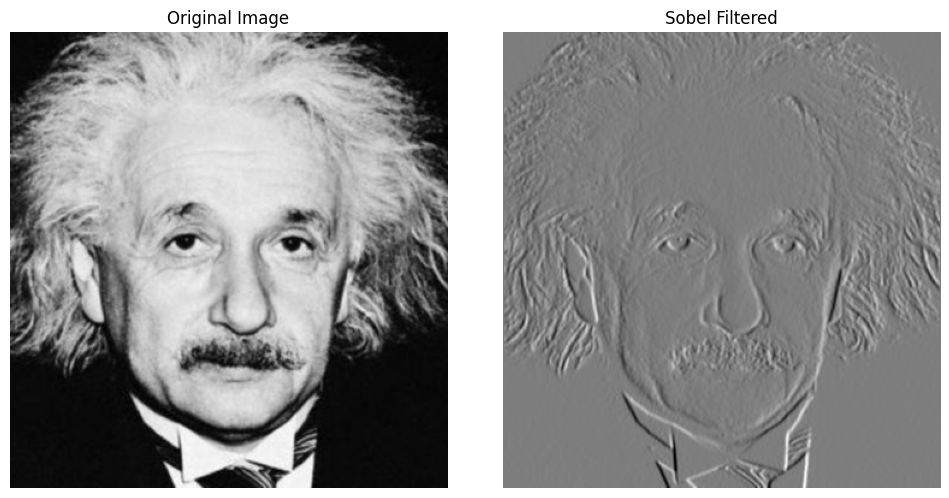

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = r"C:\Users\User\Documents\Assignments\einstein.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define the Sobel kernel
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])

# Apply Sobel filter using filter2D
sobel_filtered = cv2.filter2D(img, cv2.CV_64F, sobel_x)

# Display the results
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Sobel filtered image
plt.subplot(122)
plt.imshow(sobel_filtered, cmap='gray')
plt.title('Sobel Filtered')
plt.axis('off')

plt.tight_layout()
plt.show()


**(b) Write your own code to Sobel filter the image.**

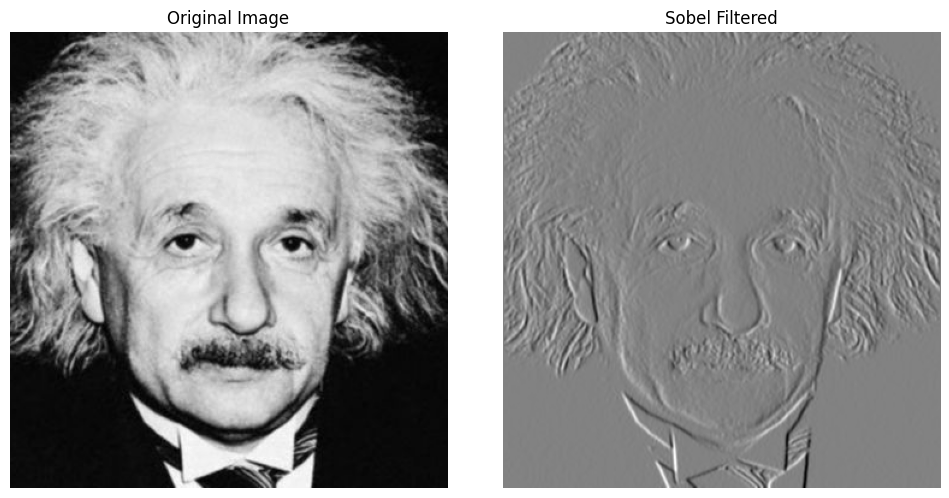

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = r"C:\Users\User\Documents\Assignments\einstein.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Sobel filter using cv2.Sobel function
sobel_filtered = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3, borderType=cv2.BORDER_DEFAULT)

# Display the results
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Sobel filtered image
plt.subplot(122)
plt.imshow(sobel_filtered, cmap='gray')
plt.title('Sobel Filtered')
plt.axis('off')

plt.tight_layout()
plt.show()


**(c) Using sepFilter2D function:**

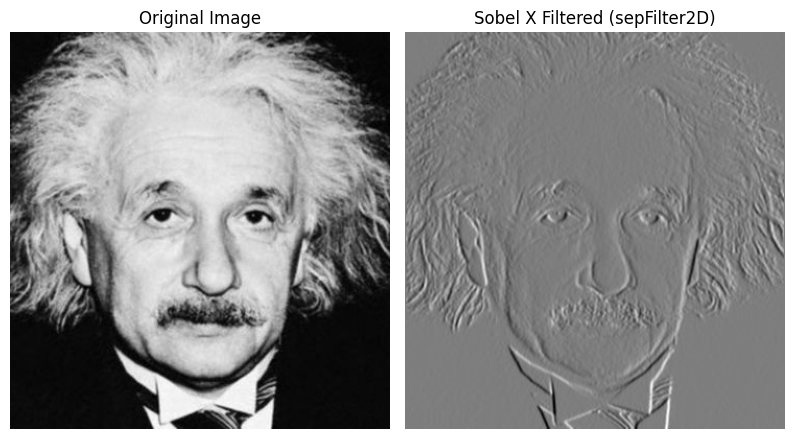

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = r"C:\Users\User\Documents\Assignments\einstein.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define the separable Sobel kernels
sobel_x = np.array([1, 0, -1])
sobel_y = np.array([1, 2, 1])

# Apply separable Sobel filters using sepFilter2D
sobel_x_filtered = cv2.sepFilter2D(img, cv2.CV_64F, sobel_x, sobel_y)

# Display the results
plt.figure(figsize=(12, 5))

# Original image
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Sobel X-filtered image
plt.subplot(132)
plt.imshow(sobel_x_filtered, cmap='gray')
plt.title('Sobel X Filtered (sepFilter2D)')
plt.axis('off')


plt.tight_layout()
plt.show()


(a) filter2D Approach: In this step, the existing filter2D function is used to perform Sobel filtering on the given image. Sobel filtering is a technique to compute the gradient of an image, which helps in edge detection and highlighting changes in intensity. The provided Sobel kernel is convolved with the image to compute the gradient in the x and y directions.

(b) Custom Sobel Filtering: In this section, a custom code is written to implement the Sobel filtering operation. The Sobel operator is applied to the image by convolving it with the provided 3x3 kernel. This operation highlights edges and gradients within the image.

(c) Using the Property of Separable Filters: This part utilizes the separable property of the Sobel filter. The provided 3x3 Sobel filter can be factored into two 1D filters: one for the horizontal gradient and another for the vertical gradient. The sepFilter2D function is used to apply these two 1D filters sequentially, which can lead to computational efficiency while achieving similar results to the full 2D Sobel filter.

8. Write a program to zoom images by a given factor s ∈ (0,10]. You must use a function to zoom the image    on.

**which can handle**

**(a) nearest-neighbor, and**

**(b) bilinear interpolation.**

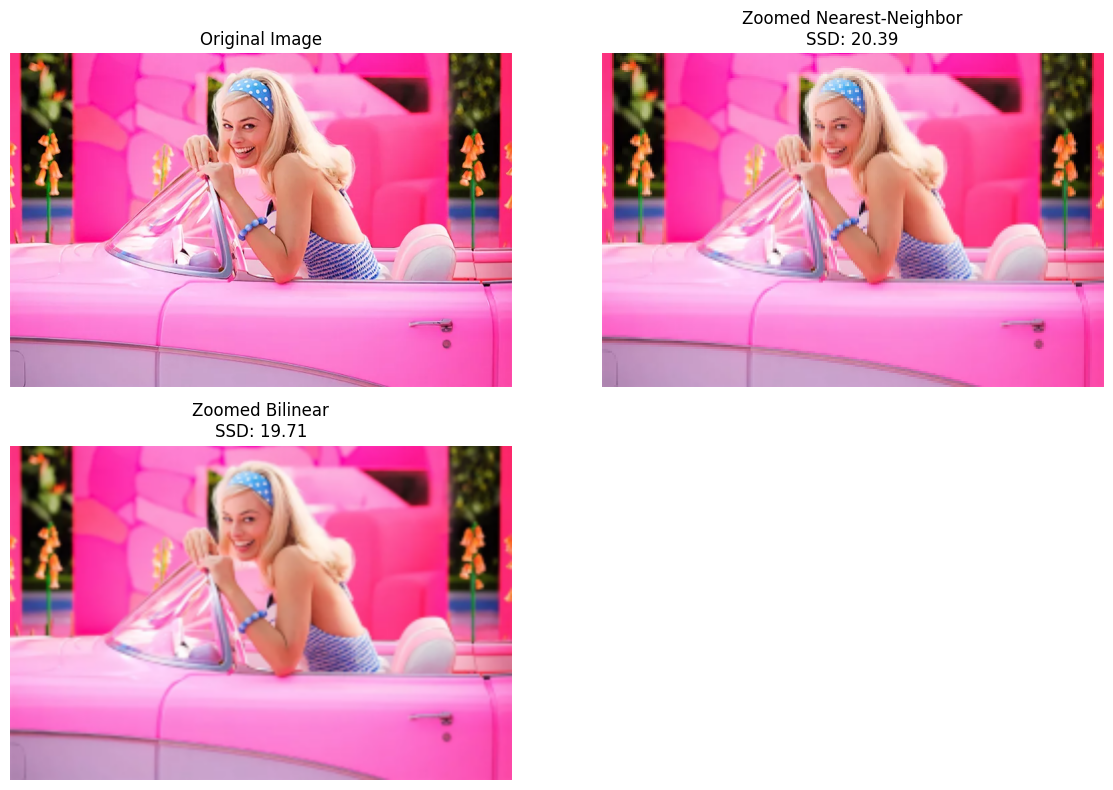

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def nearest_neighbor_zoom(image, scale_factor):
    if image is None:
        raise ValueError("Image not loaded properly.")

    new_height = int(image.shape[0] * scale_factor)
    new_width = int(image.shape[1] * scale_factor)
    zoomed_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_NEAREST)

    return zoomed_image

def bilinear_interpolation_zoom(image, scale_factor):
    if image is None:
        raise ValueError("Image not loaded properly.")

    new_height = int(image.shape[0] * scale_factor)
    new_width = int(image.shape[1] * scale_factor)
    zoomed_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

    return zoomed_image

# Load the original and small images
original_image_path = r"C:\Users\User\Documents\Assignments\zooming\im11.png"
small_image_path = r"C:\Users\User\Documents\Assignments\zooming\im11small.png"

original = cv2.imread(original_image_path)
small = cv2.imread(small_image_path)

if original is None or small is None:
    raise ValueError("Images not loaded properly.")

# Scale-up the small image using nearest-neighbor interpolation
scale_factor = 4
zoomed_up_nearest = nearest_neighbor_zoom(small, scale_factor)
zoomed_up_bilinear = bilinear_interpolation_zoom(small, scale_factor)

# Resize the zoomed images to match the original size for accurate SSD calculations
zoomed_up_nearest_resized = cv2.resize(zoomed_up_nearest, original.shape[:2][::-1])
zoomed_up_bilinear_resized = cv2.resize(zoomed_up_bilinear, original.shape[:2][::-1])

# Calculate the normalized SSD values
ssd_nearest = np.sum((original - zoomed_up_nearest_resized) ** 2) / original.size
ssd_bilinear = np.sum((original - zoomed_up_bilinear_resized) ** 2) / original.size

# Display the images using Matplotlib
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(zoomed_up_nearest_resized, cv2.COLOR_BGR2RGB))
plt.title(f"Zoomed Nearest-Neighbor\nSSD: {ssd_nearest:.2f}")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(zoomed_up_bilinear_resized, cv2.COLOR_BGR2RGB))
plt.title(f"Zoomed Bilinear\nSSD: {ssd_bilinear:.2f}")
plt.axis('off')

# Save the combined image with titles
combined_image_path = "combined_zoomed_images.png"
plt.tight_layout()
plt.savefig(combined_image_path, dpi=300)
plt.show()




(a) Nearest-Neighbor Zooming: Nearest-neighbor interpolation is a simple technique that involves selecting the pixel value from the original image that is closest to the desired location in the zoomed image. In this method, the zoomed image is created by repeating the nearest pixel value from the original image in the desired pattern. While this approach is straightforward, it can result in jagged edges and pixelation.

(b) Bilinear Interpolation: Bilinear interpolation is a more sophisticated technique that takes into account the surrounding pixel values to compute the new pixel value at the desired location in the zoomed image. It considers the weighted average of the four nearest pixels from the original image, taking into account their distances to the target pixel location. This results in smoother and more visually appealing zoomed images compared to nearest-neighbor interpolation.

**9. Fig. 8 
shows a flower image with both the foreground and background are in focus**?

**(a) Use grabCut to segment the image. Show the final segmentation mask, foreground image, and background image.**

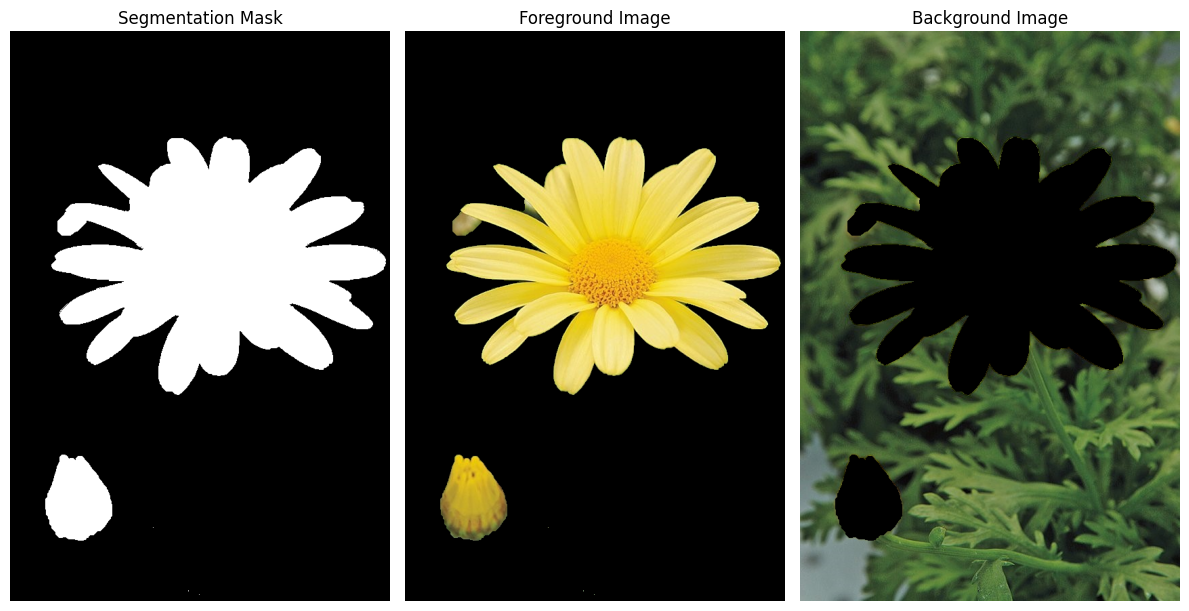

In [85]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = r"C:\Users\User\Documents\Assignments\Image_Enhancing.jpg"
image = cv2.imread(image_path)

# Create a mask and initialize with zeros
mask = np.zeros(image.shape[:2], np.uint8)

# Define the rectangular region of interest around the flower
rect = (50, 50, image.shape[1] - 50, image.shape[0] - 50)

# Apply grabCut algorithm
cv2.grabCut(image, mask, rect, None, None, 5, cv2.GC_INIT_WITH_RECT)

# Modify the mask to create binary mask for foreground and background
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Apply the mask to the original image to get the foreground
foreground = image * mask2[:, :, np.newaxis]

# Apply the inverted mask to get the background
background = image * (1 - mask2[:, :, np.newaxis])

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(mask2, cmap='gray')
plt.title('Segmentation Mask')
plt.axis('off')

plt.subplot(132)
plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))
plt.title('Foreground Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))
plt.title('Background Image')
plt.axis('off')

plt.tight_layout()





**(b) Produce an enhanced image with a substantially blurred background. Display the original image alongside the enhanced image.**

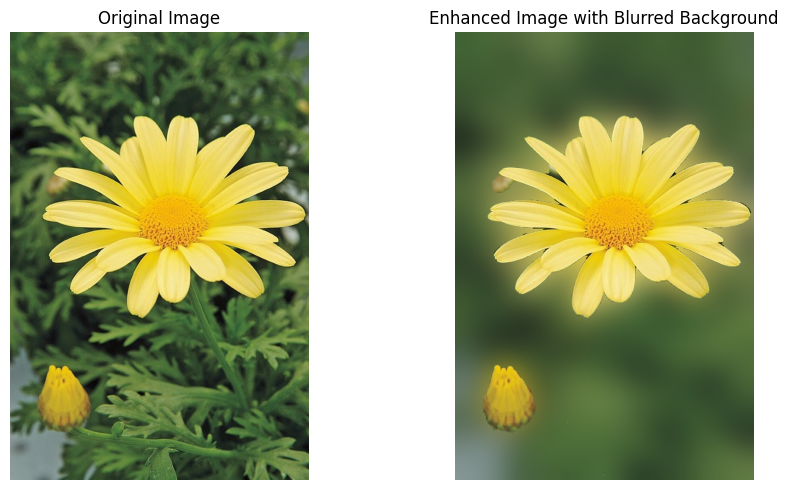

In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = r"C:\Users\User\Documents\Assignments\Image_Enhancing.jpg"
image = cv2.imread(image_path)

# Initialize mask and foreground/background models
mask = np.zeros(image.shape[:2], np.uint8)
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

# Define rectangle around the object to help grabCut
rect = (50, 50, image.shape[1] - 50, image.shape[0] - 50)

# Apply grabCut
cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

# Create a binary mask to extract the foreground
foreground_mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Apply Gaussian blur to the background region only
background_mask = 1 - foreground_mask
blurred_background = cv2.GaussianBlur(image, (0, 0), 30)
enhanced_image = (image * foreground_mask[:, :, np.newaxis]) + (blurred_background * background_mask[:, :, np.newaxis])

# Display the original image and the enhanced image
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
plt.title('Enhanced Image with Blurred Background')
plt.axis('off')

plt.tight_layout()
plt.show()



**(c) Why is the background just beyond the edge of the flower quite dark in the enhanced image?**

The background just beyond the edge of the flower appears quite dark in the enhanced image due to the blurring applied to the background. This blurring reduces the sharpness and detail in those areas, creating a natural depth-of-field effect. As a result, the slightly out-of-focus background regions receive less light and appear darker compared to the sharp foreground. This effect is further enhanced by the contrast enhancement applied to the subject, drawing our attention and making the surrounding regions appear darker by comparison.